In [151]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
import re
matplotlib.rcParams["figure.dpi"] = 300


# Load file

In [152]:
# input = "/work/rcereghetti/out_vbfhh4b/output_vbf_matching3/output_all.coffea"
# o = load(f"{input}")
input = "/work/rcereghetti/out_vbfhh4b/out_test/output_all.coffea"
o = load(f"{input}")

# Function to extract the cut string

In [153]:
def remove_if_found(word, substring):
    if substring in word:
        return word.replace(substring, '')
    return word  # Restituisce la parola invariata se la sottostringa non è trovata

# Create a dictionary with number of events for every step and region

In [154]:
cuts_dict = {}

pattern = r'^[^_]+_[^_]+_([^_]+)_region'

for k in o["cutflow"].keys():    
    if "VBFtight" in k and "VBFtight_region" not in k:
        a = remove_if_found(k, "4b_")
        b = remove_if_found(a, "_region")
        c = remove_if_found(b, "VBFtight_")
        string = c
    else: string = k
    for kk in o["cutflow"][k].keys():
        if isinstance(o['cutflow'][k][kk], int):
            cuts_dict[string] = o['cutflow'][k][kk]
        else:
            cuts_dict[string] = o['cutflow'][k][kk]['VBF_HHto4B']


# Print the efficiency 

In [155]:
cuts_list = list(cuts_dict)

for i in range(4, len(cuts_list)):
    print(f"Efficiency for {cuts_list[i]} with respect to 4b_region: {cuts_dict[cuts_list[i]] / cuts_dict['4b_region']}")

Efficiency for njet_vbf with respect to 4b_region: 0.5927005597014925


# Check signal efficiency 3rd and 4th jet

In [156]:
sample=list(o["columns"].keys())[0]
dataset=list(o["columns"][sample].keys())[0]
col={}
for i in range(len(o["columns"][sample][dataset].keys())):
    category = list(o["columns"][sample][dataset].keys())[i]
    col[list(o["columns"][sample][dataset].keys())[i]] = o["columns"][sample][dataset][category]


[1. 4. 0. ... 6. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
597.0 13372 0.044645527968890215


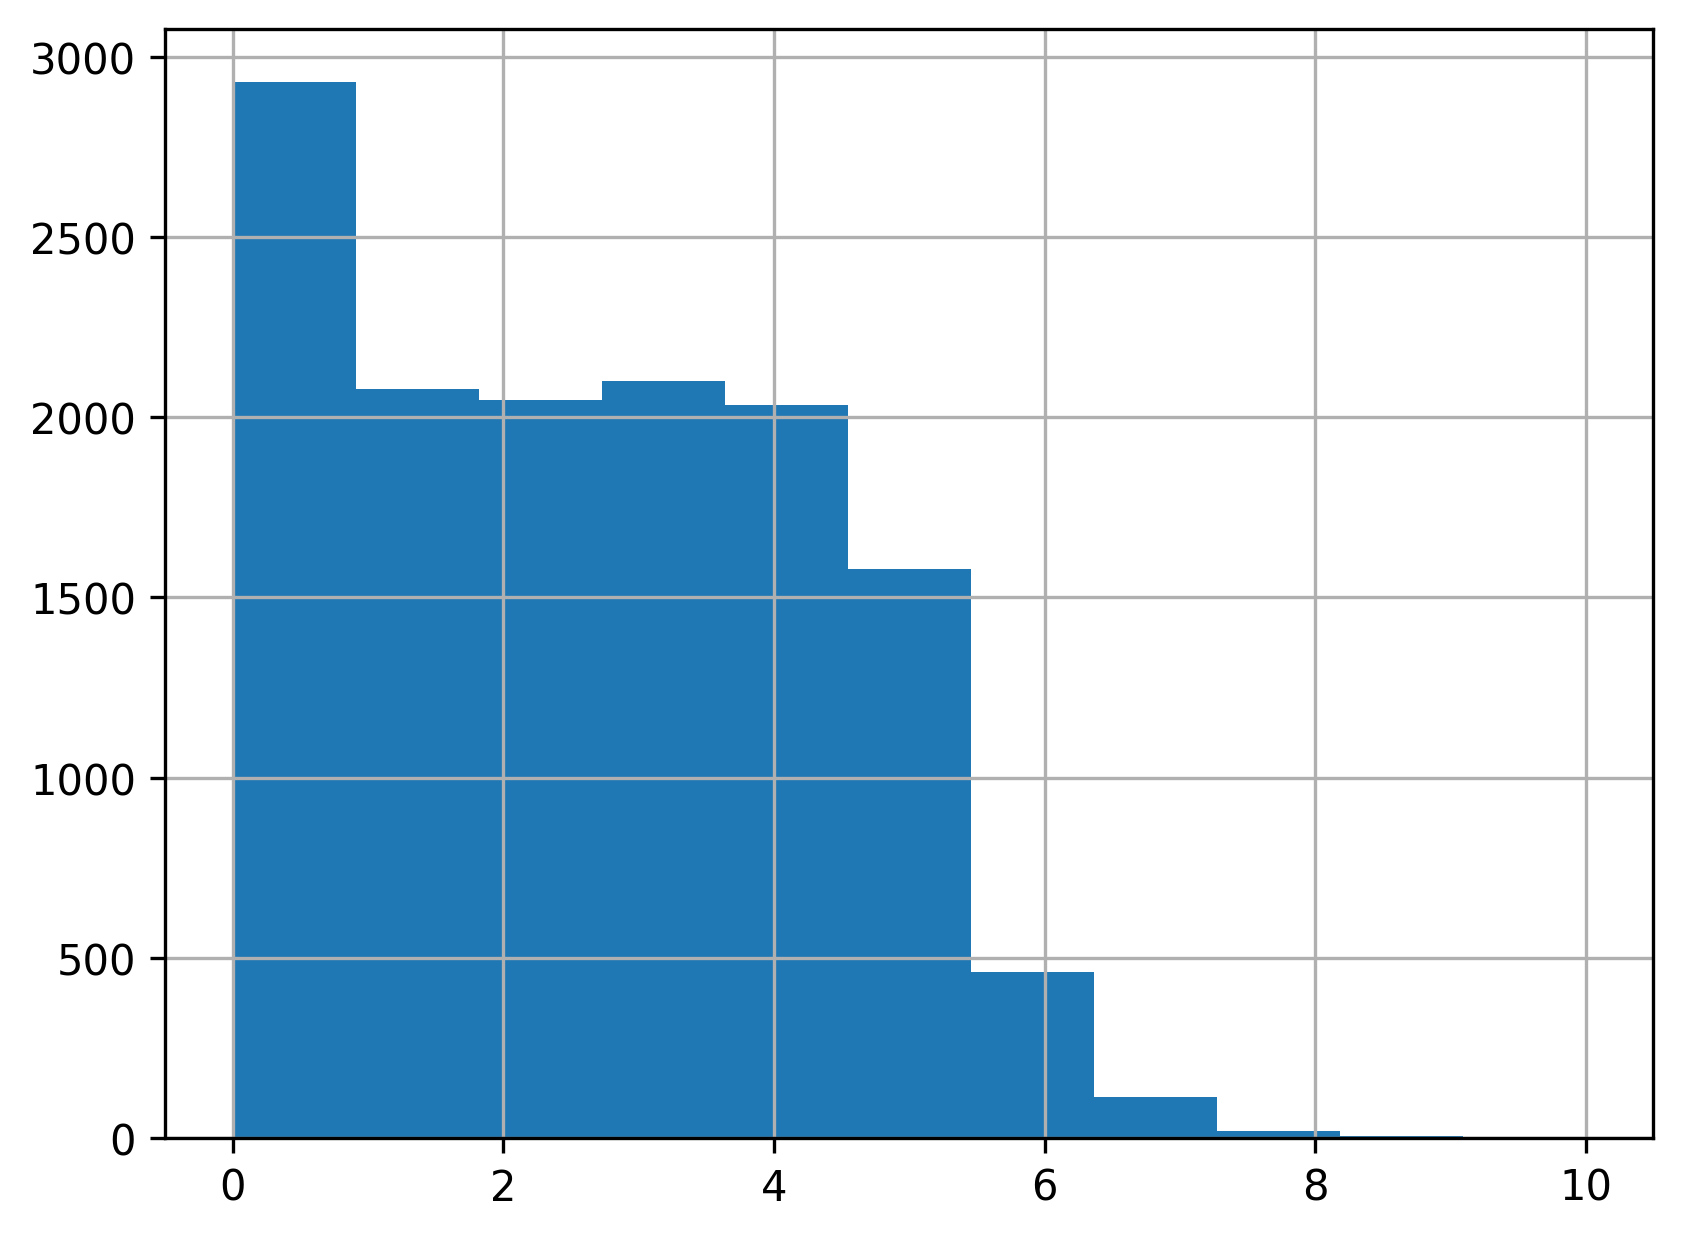

In [183]:
index = col["4b_region"]["JetGoodVBF_matched_index"].value
print(index)
tot = np.zeros(11)
print(tot)
for i in range(len(index)):
    tot[int(index[i])]+=1
# for i in range(len(tot)):
    # print(tot[i]/len(index))
print(np.sum(tot[6:]),len(index), np.sum(tot[6:])/len(index))
plt.hist(index, 11)
plt.grid()
plt.show()